In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install  keras==2.2.4

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import pandas as pd
import cv2                 
import numpy as np     
# import keras    
import os                  
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
import matplotlib.pyplot as plt

In [ ]:
path = './drive/My Drive/Deep Learning Term Project/'
# TRAIN_DIR = path + "Deep Learning Term Project/chest_xray/train/"
# TEST_DIR =  path + "DL project/chest_xray/test/"

In [ ]:
X_train = np.load(path+"X_train.npy")
y_train = np.load(path+"y_train.npy")
X_val = np.load(path+"X_val.npy")
y_val = np.load(path+"y_val.npy")
X_test = np.load(path+"X_test.npy")
y_test = np.load(path+"y_test.npy")

In [ ]:
Pimages = os.listdir(TRAIN_DIR + "PNEUMONIA")
Nimages = os.listdir(TRAIN_DIR + "NORMAL")

In [ ]:
def plotter(i):
    imagep1 = cv2.imread("{0}{1}{2}".format(TRAIN_DIR, "PNEUMONIA/", Pimages[i]))
    imagep1 = skimage.transform.resize(imagep1, (150, 150, 3) , mode = 'reflect')
    imagen1 = cv2.imread("{0}{1}{2}".format(TRAIN_DIR, "NORMAL/", Nimages[i]))
    imagen1 = skimage.transform.resize(imagen1, (150, 150, 3), mode = 'reflect')
    pair = np.concatenate((imagen1, imagep1), axis=1)
    print("No Pneumonia Vs Pneumonia")
    print("---------------------------------------------------------------------------------------------------------------")
    plt.figure(figsize=(5,5))
    plt.imshow(pair)
    plt.show()

No Pneumonia Vs Pneumonia
---------------------------------------------------------------------------------------------------------------


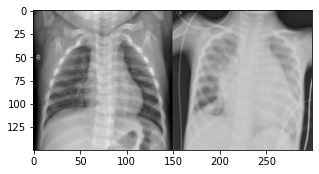

No Pneumonia Vs Pneumonia
---------------------------------------------------------------------------------------------------------------


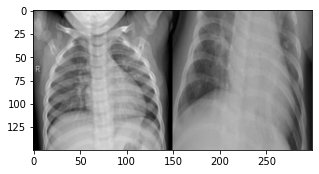

No Pneumonia Vs Pneumonia
---------------------------------------------------------------------------------------------------------------


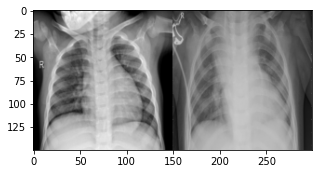

No Pneumonia Vs Pneumonia
---------------------------------------------------------------------------------------------------------------


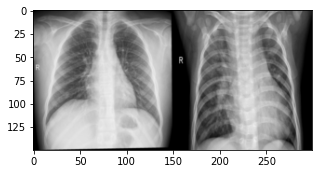

No Pneumonia Vs Pneumonia
---------------------------------------------------------------------------------------------------------------


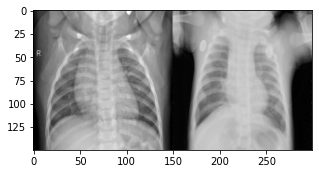

In [ ]:
for i in range(4,9):
    plotter(i)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Plot of the number of samples of each class in the training set')

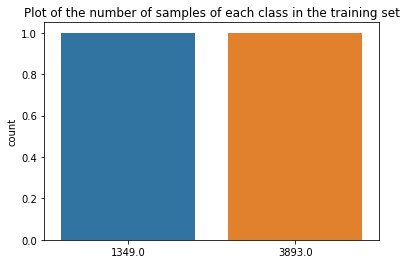

In [ ]:
import seaborn as sns
count = y_train.sum(axis = 0)
sns.countplot(x = count)
plt.title("Plot of the number of samples of each class in the training set")

Text(0.5, 1.0, 'Plot of the number of samples of each class in the test set')

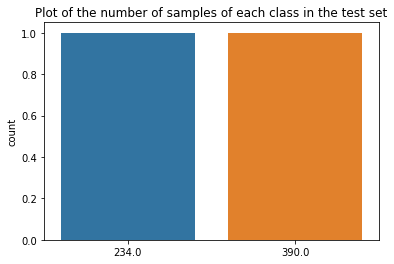

In [ ]:
count = y_test.sum(axis = 0)
sns.countplot(x = count)
plt.title("Plot of the number of samples of each class in the test set")

In [ ]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_delta=0.0001, patience=1, verbose=1)

Using TensorFlow backend.


In [ ]:
filepath="weights_batchnorm_1.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
import keras
print(keras.__version__)

Using TensorFlow backend.


2.2.4


In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense , Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD , RMSprop, Adam
from keras.layers import Conv2D , BatchNormalization,AveragePooling2D
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
# K.set_image_dim_ordering('th')
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.np_utils import to_categorical

In [ ]:
X_train=X_train.reshape(-1,150,150,3)
X_val = X_val.reshape(-1,150,150,3)
X_test=X_test.reshape(-1,150,150,3)

In [ ]:
# X_train = X_train/255.0
# X_val = X_val/255.0
# X_test = X_test/255.0

In [ ]:
# from sklearn.model_selection import StratifiedShuffleSplit

# sss = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2,random_state = 0)
# train_ind,val_ind = sss.split(X_train,y_train)
# print(train_ind,val_ind)

In [ ]:
def swish_activation(x):
    return (K.sigmoid(x) * x)

In [ ]:
batch_size = 1
epochs = 20

import gc
gc.collect()

113

In [ ]:
path2 = "./drive/My Drive/DL project/"

In [ ]:
from keras.applications.densenet import DenseNet121, preprocess_input, decode_predictions
baseModel = DenseNet121(input_shape=(150,150,3),include_top=False,weights='imagenet')
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(3,3))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(2, activation="softmax")(headModel)
# model.summary()

In [ ]:
model = Model(inputs=baseModel.input, outputs=headModel)
print(model.summary())
model.compile(loss='binary_crossentropy',
                  optimizer= Adam(lr=0.00008),
                  metrics=['accuracy'])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 75, 75, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [ ]:
from keras.applications.densenet import DenseNet121, preprocess_input, decode_predictions


def pop_layer(model):
    if not model.outputs:
        raise Exception('Sequential model cannot be popped: model is empty.')

    model.layers.pop()
    if not model.layers:
        model.outputs = []
        model.inbound_nodes = []
        model.outbound_nodes = []
    else:
        model.layers[-1].outbound_nodes = []
        model.outputs = [model.layers[-1].output]
    model.built = False

def get_model():
    #Fully convolutional part of VGG16
    model = DenseNet121(input_shape=(150,150,3),weights=path2+'weights.h5',classes=14)
    
    #Remove last max pooling layer
    pop_layer(model)
    
    #Freeze pretrained layers
    # for layer in model.layers:
    #     layer.trainable = False
    
    model = Model(inputs=model.inputs, outputs=model.outputs)
    
    print('len(model.layers)', len(model.layers)) 
    print(model.summary()) 
    head = Dense(2, activation='softmax')(model.output)
    
    model = Model(inputs=model.inputs, outputs=head)
    
    model.compile(loss='binary_crossentropy',
                  optimizer= Adam(lr=0.00008),
                  metrics=['accuracy'])
    
    print('len(model.layers)', len(model.layers)) 
    print(model.summary()) 
    
    return model

In [ ]:
from sklearn.utils import class_weight
weights = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train[:,1])
history = model.fit(X_train, y_train, validation_data = (X_val , y_val) ,callbacks=[lr_reduce,checkpoint] ,
          epochs=epochs,class_weight=weights)



Train on 4185 samples, validate on 1047 samples
Epoch 1/20
4185/4185 [==============================] - 63s 15ms/step - loss: 0.1436 - acc: 0.9410 - val_loss: 0.1219 - val_acc: 0.9503

Epoch 00001: val_acc improved from -inf to 0.95033, saving model to weights_batchnorm_1.hdf5
Epoch 2/20
4185/4185 [==============================] - 27s 6ms/step - loss: 0.0241 - acc: 0.9921 - val_loss: 0.1129 - val_acc: 0.9656

Epoch 00002: val_acc improved from 0.95033 to 0.96562, saving model to weights_batchnorm_1.hdf5
Epoch 3/20
4185/4185 [==============================] - 26s 6ms/step - loss: 0.0105 - acc: 0.9971 - val_loss: 0.0700 - val_acc: 0.9790

Epoch 00003: val_acc improved from 0.96562 to 0.97899, saving model to weights_batchnorm_1.hdf5
Epoch 4/20
4185/4185 [==============================] - 26s 6ms/step - loss: 0.0107 - acc: 0.9955 - val_loss: 0.0914 - val_acc: 0.9694

Epoch 00004: ReduceLROnPlateau reducing learning rate to 7.999999797903002e-06.

Epoch 00004: val_acc did not improve fr

In [ ]:
model = get_model()

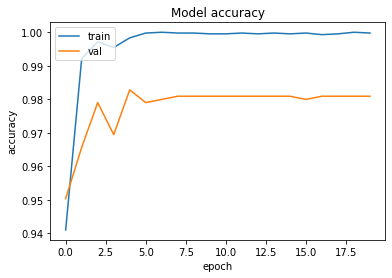

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig(path2+"densenet_imagenet_accuracy.png")
# plt.show()


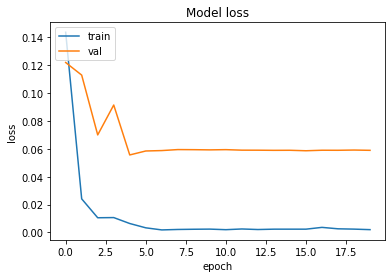

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig(path2+"densenet_imagenet_loss.png")
# plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
# y_true = np.argmax(y_test,axis = 0)

In [ ]:
y_true = y_test

In [ ]:
from sklearn.metrics import accuracy_score,f1_score
print("accuracy ",accuracy_score(y_true, pred))
print("f1 score ",f1_score(y_true, pred))

accuracy  0.8221153846153846
f1 score  0.8754208754208754


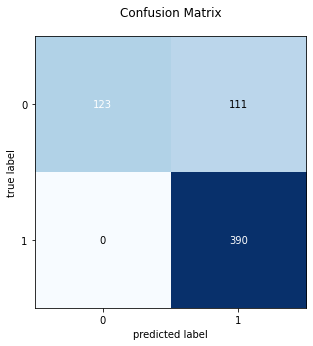

In [ ]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.title("Confusion Matrix")
plt.show()

In [ ]:
def get_metric(cm):
    tn, fp, fn, tp = cm.ravel()
    precision = float(tp)/(tp+fp)
    recall = float(tp)/(tp+fn)
    return precision, recall

precision, recall = get_metric(CM)
print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
f1_score = 2*(precision*recall)/(precision+recall)
print("F1 score of the model is {:.2f}".format(f1_score))

Recall of the model is 1.00
Precision of the model is 0.78
F1 score of the model is 0.88


In [ ]:
model.save_weights(path2+"densenet_imagenet_weighted.h5")

In [ ]:
model.load_weights(path2+"densenet_weighted.h5")

In [ ]:
model.summary()

In [ ]:
import scipy as sp
gap_weights = model.get_layer('conv3_block12_1_bn').get_weights()[0]
gap_weights.shape

(128,)

In [ ]:
import scipy as sp
gap_weights = model.layers[-1].get_weights()[0]
gap_weights.shape

(1024, 2)

In [ ]:
names = [weight.name for layer in model.layers for weight in layer.weights]
weights = model.get_weights()

for name, weight in zip(names, weights):
    print(name,"    ",weight.shape)

In [ ]:
cam_model = Model(inputs=model.input,outputs=(model.get_layer('conv3_block12_1_conv').output,model.layers[-1].output))

In [ ]:
cam_model = Model(inputs=model.input,outputs=(model.layers[-3].output,model.layers[-1].output))

In [ ]:
features,results = cam_model.predict(X_test)
features.shape

(624, 4, 4, 1024)

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[1.0327991  1.3421174  1.2414589  0.26073918]
 [1.0929488  1.303424   1.3083512  0.9673632 ]
 [5.423408   9.519325   8.975758   3.43473   ]
 [3.218893   7.7414804  8.751051   3.401322  ]]


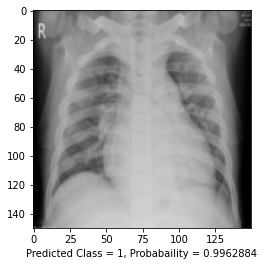

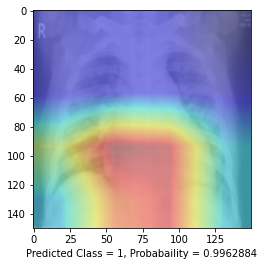

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[ 1.0753832   1.40695     0.56016135  0.17805578]
 [ 1.780423    2.2117622   1.4996614   0.9126635 ]
 [ 7.626487   11.940777   10.064623    3.3008783 ]
 [ 6.4319677  10.856176   10.174102    3.0305278 ]]


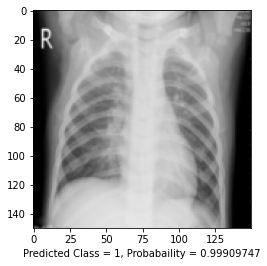

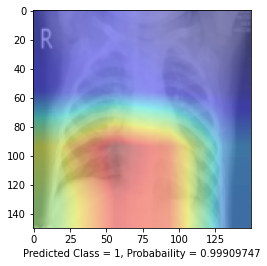

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[ 1.0314142  1.7255331  1.7150877  1.3681952]
 [ 1.616647   1.779561   1.7109473  1.2128004]
 [ 7.7916365 10.33461    6.789394   2.235422 ]
 [ 6.829181   8.403708   6.406585   1.8512583]]


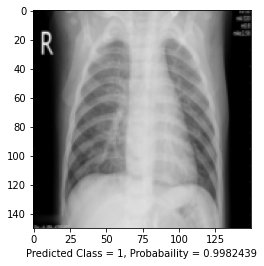

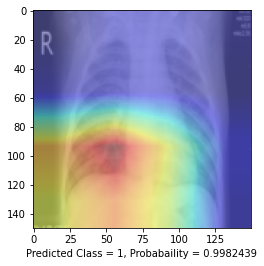

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[ 1.1090107   1.4069325   0.2952136  -0.15529081]
 [ 1.7675424   1.9466457   1.1507357   0.7815225 ]
 [ 8.500387   11.961535    8.3114805   3.087688  ]
 [ 7.412693   10.377982    8.484076    2.9242246 ]]


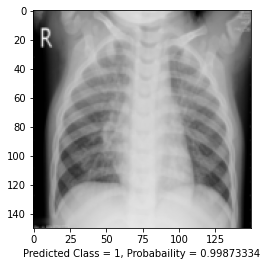

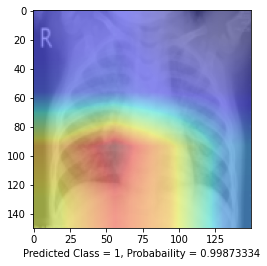

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[ 1.1909097  1.6591101  1.7187881  1.4403609]
 [ 1.3796691  1.606662   1.492665   1.7115624]
 [ 6.074433  10.11136    9.455954   2.6745834]
 [ 5.656565   9.040756   8.973882   2.4528942]]


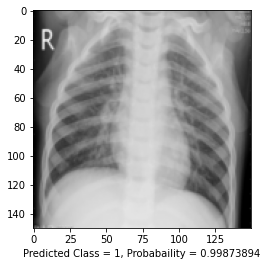

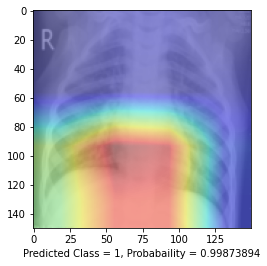

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[1.0144795 1.9243244 1.8486196 1.4768828]
 [1.5652755 1.3892524 1.2084433 1.1362253]
 [4.03989   5.186725  3.462525  1.0847905]
 [3.2439702 4.164766  3.0471623 1.0531721]]


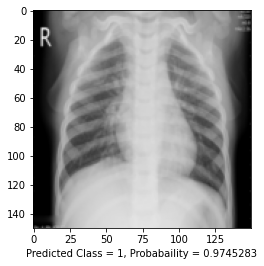

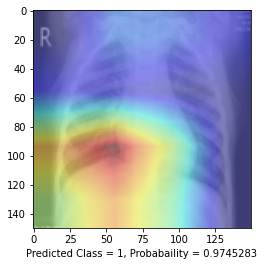

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[1.0549338 1.7874973 1.8660728 1.7398219]
 [1.3513634 1.3640077 1.6009129 1.5045085]
 [5.0323462 8.393326  7.470799  1.8705256]
 [3.563002  7.1113067 7.3859572 1.9277089]]


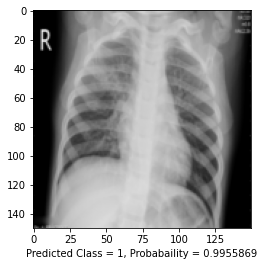

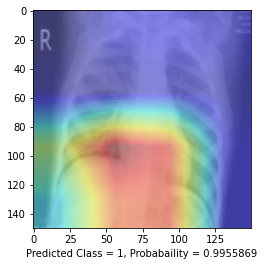

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[ 1.1196393  1.6929758  1.1103015  0.9957147]
 [ 1.5511901  1.6926963  1.580635   1.2817144]
 [ 8.119552  11.352678   6.943185   2.8735807]
 [ 7.4215894  9.685518   6.261253   2.9050913]]


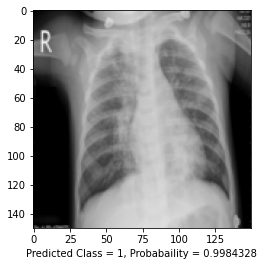

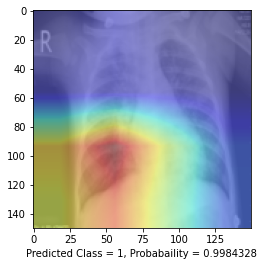

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[ 5.9033066e-01  4.8603666e-01 -6.5822476e-03 -4.0083457e-02]
 [ 1.2004415e+00  9.3287748e-01  6.5044659e-01  8.4038663e-01]
 [ 4.7302866e+00  8.0700016e+00  8.0462828e+00  2.2394109e+00]
 [ 3.5040503e+00  7.0373740e+00  7.8079748e+00  1.9251587e+00]]


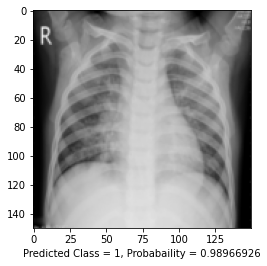

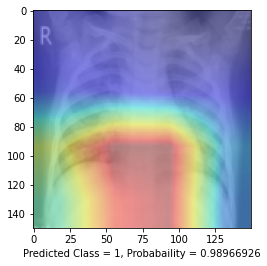

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[ 0.6191443   0.0664528   0.35969695  0.75265574]
 [ 1.3909991   1.1500012   0.68817836  1.0295591 ]
 [ 9.260552   12.22381     8.449829    2.3168342 ]
 [ 7.916807   10.374211    7.9065747   1.9348445 ]]


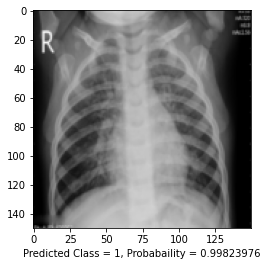

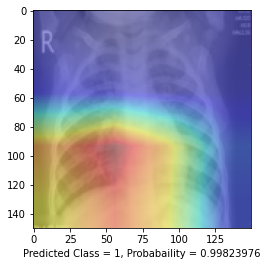

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[1.451139   1.8326889  1.0968046  0.27734935]
 [1.6569377  1.2355193  0.40268323 1.025443  ]
 [1.1295497  2.7552798  2.9694333  1.7855781 ]
 [0.00709205 1.3111932  2.774794   1.5185976 ]]


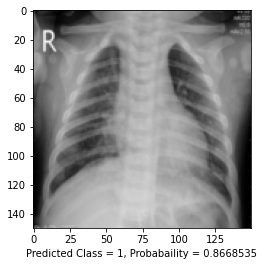

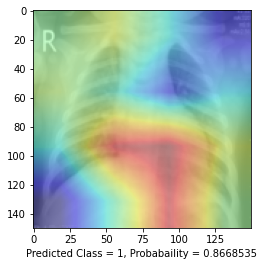

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[ 1.2322894  2.5058596  2.4897375  1.7464896]
 [ 1.8687752  2.2245502  2.092942   1.5988917]
 [ 7.8677716 11.668824   8.40079    2.7872238]
 [ 6.839148   9.6448555  8.044504   2.5457804]]


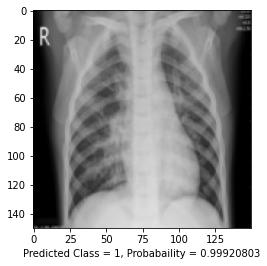

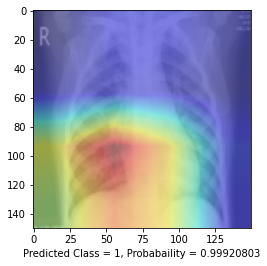

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[1.2665803 1.6482455 1.7106979 1.3165773]
 [1.6208537 1.9251529 2.1128821 1.6743798]
 [5.783233  8.43226   6.7770705 2.3162081]
 [3.67395   6.2039394 6.2845583 1.7267659]]


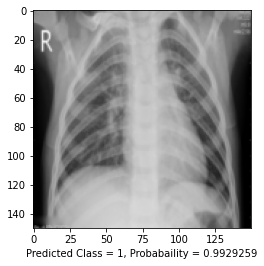

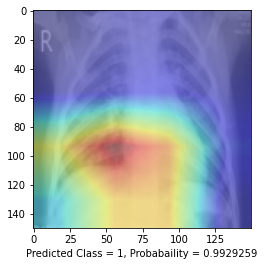

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[1.1878211 2.1083226 1.9322507 1.5975204]
 [1.6526477 2.2269452 1.7979959 1.57915  ]
 [7.5244102 9.943675  7.9674582 1.6813885]
 [6.785895  8.55806   7.679664  1.3386432]]


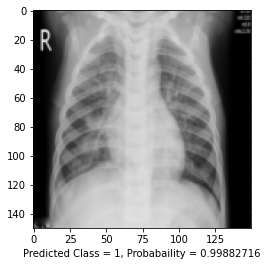

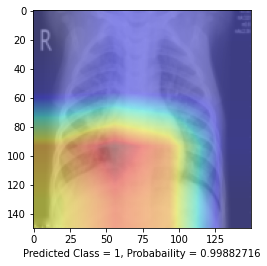

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[ 1.7495451  2.4831226  2.1470876  1.7805789]
 [ 1.5784549  1.6909915  2.0277975  1.7664812]
 [ 7.2544928 11.167265   8.0909815  2.8045135]
 [ 5.8796053  8.8779745  8.058265   2.8481946]]


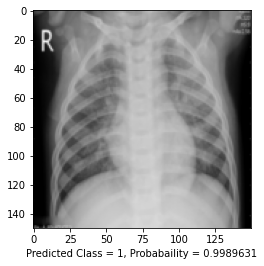

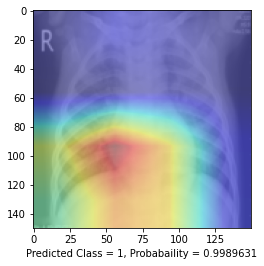

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[1.0638533  2.0339396  1.8483324  1.4041349 ]
 [1.331557   1.6952708  1.8930324  1.8075049 ]
 [1.05414    2.5456262  2.784978   2.0399222 ]
 [0.06954842 1.0509368  2.0899343  1.5751307 ]]


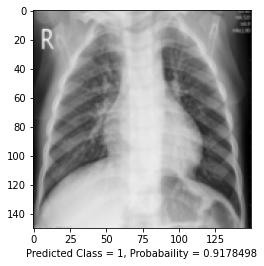

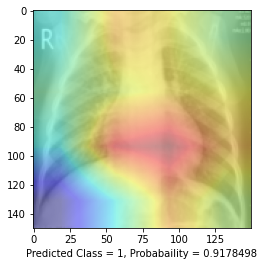

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[0.99488866 1.4345356  1.5220265  1.262366  ]
 [1.6901591  1.7396259  1.7601222  1.2016155 ]
 [7.4786687  9.603891   5.2672133  1.8895334 ]
 [6.5284615  8.1938095  5.4160376  1.891014  ]]


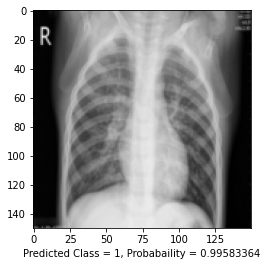

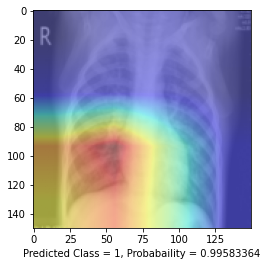

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[ 1.1188173  1.7426172  1.8466709  1.4139034]
 [ 1.8484262  2.1544302  2.0724487  1.3879042]
 [ 8.87783   11.359593   7.1470256  2.2391841]
 [ 7.907682   9.858377   7.0086446  1.9932646]]


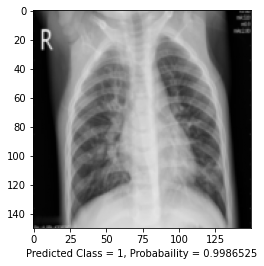

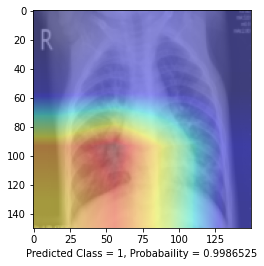

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[0.9130777 1.8351883 2.0808501 1.7573184]
 [1.2473968 1.719018  1.7044733 1.5113633]
 [6.051554  9.005597  6.5492206 1.7902831]
 [5.798857  7.779272  6.3707767 1.9781168]]


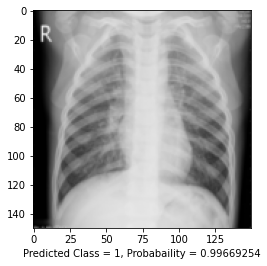

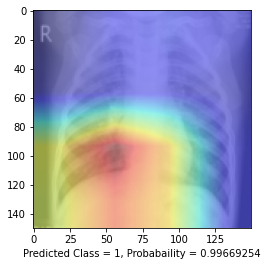

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[ 0.89116925  1.9350703   1.7968055   1.44451   ]
 [ 1.6730517   2.0204089   2.3351424   1.9156791 ]
 [ 8.475016   12.897593    8.888365    3.4020443 ]
 [ 6.9543104  10.672059    8.396472    3.5348456 ]]


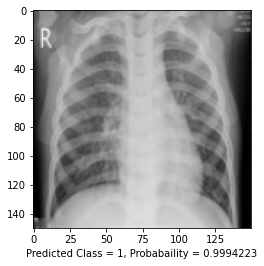

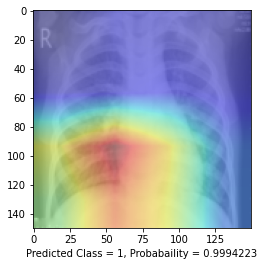

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[1.5827485 2.2892354 2.1173077 1.0639063]
 [1.7745546 2.0363245 2.1340375 1.9164698]
 [6.026071  8.897963  6.3909087 3.064255 ]
 [4.689678  7.107117  5.894152  2.7152045]]


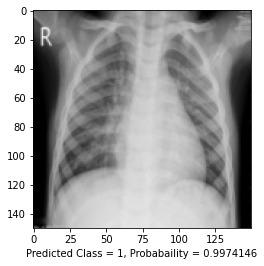

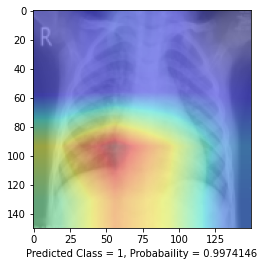

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[ 0.92703646  0.728401    0.06800058 -0.2722107 ]
 [ 1.7066818   1.7478038   1.0301554   0.8341506 ]
 [ 7.272638   10.773506    8.746055    2.4215205 ]
 [ 5.7321563   9.239567    8.455332    2.9533832 ]]


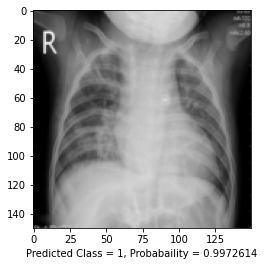

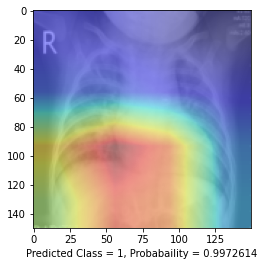

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[1.1707847 1.4729507 1.4123616 1.2598913]
 [1.417953  1.4529371 1.7541589 1.1421695]
 [4.107312  5.626044  3.5978587 1.0747191]
 [3.5347543 4.3950086 3.3404622 1.6743935]]


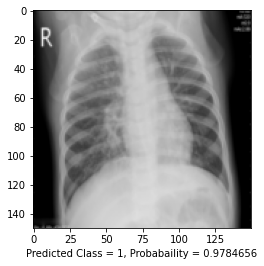

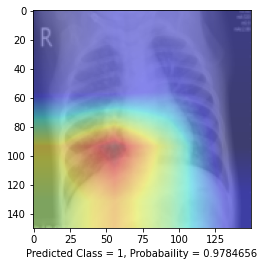

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[1.1215829 1.864449  1.631469  0.7339322]
 [1.0826598 1.4330851 1.6045313 1.0946763]
 [7.194635  9.872     7.6587863 2.5053377]
 [7.2043133 9.394544  7.7716746 2.371106 ]]


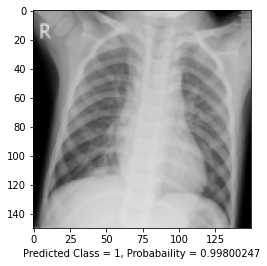

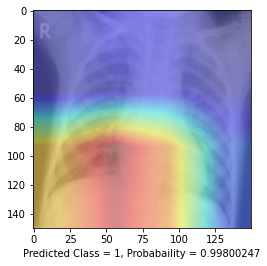

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[ 1.1588342   1.1411119   0.13736343 -0.23798391]
 [ 1.5546539   1.034352   -0.02631516  0.15524247]
 [ 7.0371985   9.307665    5.322232    2.4719718 ]
 [ 5.32346     7.505673    5.090316    2.8100255 ]]


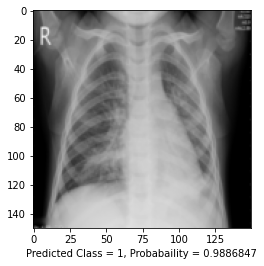

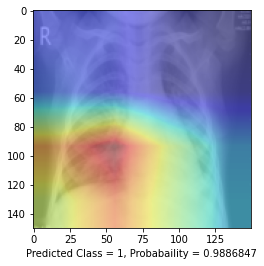

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[ 0.94933254  1.5629824   1.4389933   1.1560156 ]
 [ 1.7957804   2.0795786   1.898411    1.4464512 ]
 [ 8.726012   10.922115    8.004174    1.989722  ]
 [ 7.443268    8.803278    7.5298924   1.3642542 ]]


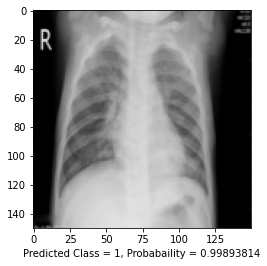

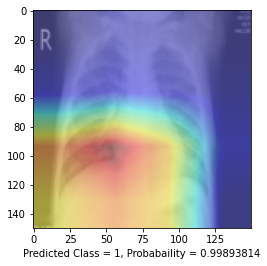

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[1.2678785 1.5751925 0.9684798 0.6022182]
 [1.142322  1.2875695 0.4660903 0.640937 ]
 [2.415173  5.597354  5.023366  2.0863955]
 [2.2843473 5.554646  5.90032   2.2269173]]


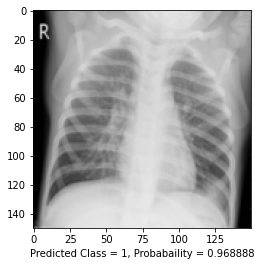

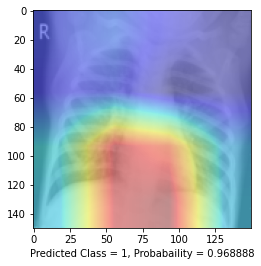

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[1.257222   1.8141617  1.8713913  1.3307865 ]
 [1.1038576  1.5231742  0.96952766 1.0520525 ]
 [7.266122   9.516564   7.8406906  1.1191555 ]
 [7.9938293  8.858944   7.029901   1.2200893 ]]


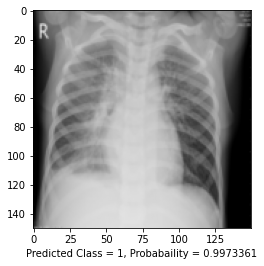

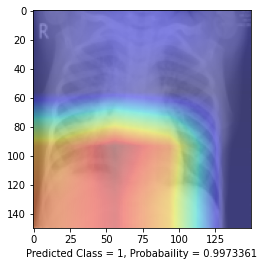

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[1.3964691 2.480935  2.2255516 1.6596754]
 [1.7062277 2.3325565 1.829536  1.6617742]
 [6.6915174 9.77917   7.347597  2.362254 ]
 [5.7590575 7.9254174 6.7043624 1.9221917]]


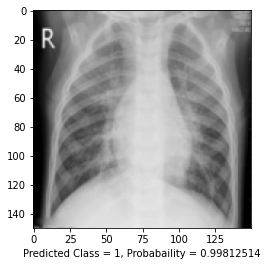

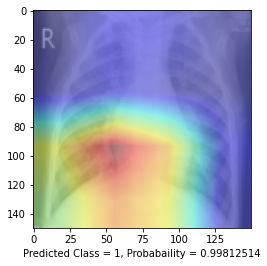

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[ 1.0653157  1.7868837  1.777857   1.4605639]
 [ 1.9171617  2.1210468  2.0709994  1.4332105]
 [ 7.884781  10.044795   7.393015   1.5224818]
 [ 6.8708196  8.081776   6.9501963  1.3471209]]


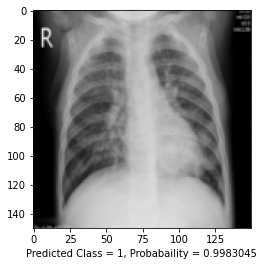

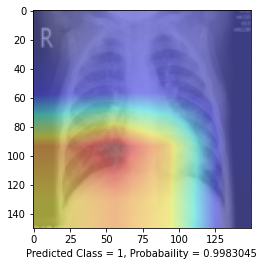

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[ 1.0486202  1.8459     1.7680103  1.453598 ]
 [ 1.7258646  2.047132   2.0905194  1.7397304]
 [ 8.354197  12.113703   9.210435   2.824042 ]
 [ 7.2517815 10.320498   9.080551   3.341482 ]]


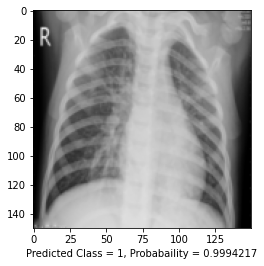

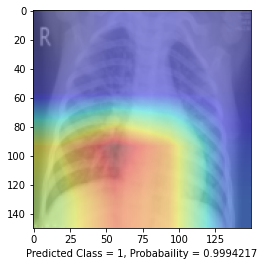

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[1.6868724 2.248107  1.9210312 1.693858 ]
 [1.7455446 1.8438826 1.3284557 1.5246958]
 [5.7071633 8.627826  6.4841366 2.6381965]
 [4.4502606 7.563911  6.8486814 2.505475 ]]


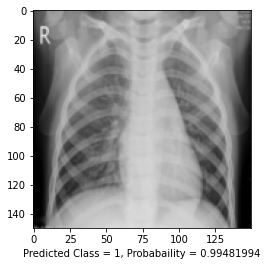

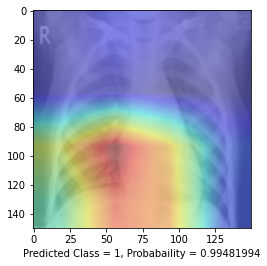

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[ 1.1541799  1.8745843  1.9077166  1.7231628]
 [ 1.9110576  2.4801698  2.391209   1.5264317]
 [ 8.947189  12.85447    9.629191   3.145431 ]
 [ 7.5285363 10.994668   9.413738   2.5058556]]


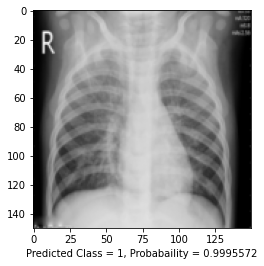

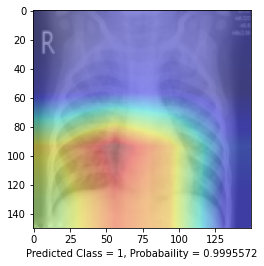

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[ 1.2807215  1.6644235  1.7024949  1.0163344]
 [ 1.9220865  2.3541532  1.8564758  1.4862984]
 [ 7.9619226 10.64109    6.8033843  2.6749508]
 [ 7.592414   9.270687   6.9080505  2.8889043]]


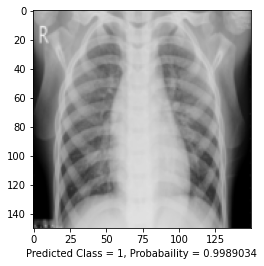

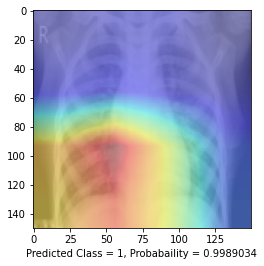

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[ 1.1890979  2.3696828  2.1671164  1.6342046]
 [ 2.0211987  2.275033   2.2738714  1.6589974]
 [ 8.871936  11.111623   6.802544   2.0229056]
 [ 7.7376614  9.419544   6.6883755  1.797609 ]]


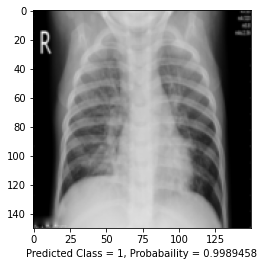

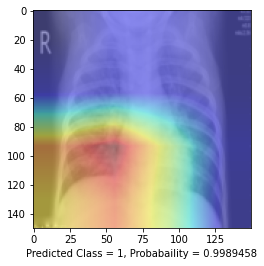

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[ 1.1108917  1.5983909  1.7286375  1.5620028]
 [ 1.6131134  1.5709614  1.5643358  1.3422823]
 [ 8.569004  10.1221485  5.5822062  1.8754563]
 [ 7.4077344  8.501248   5.3839116  1.2147888]]


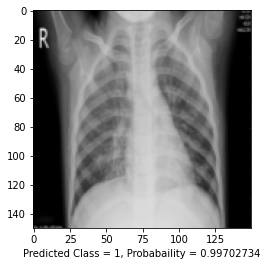

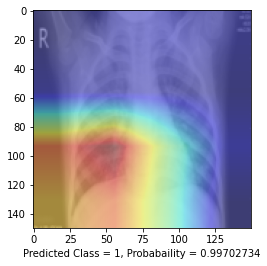

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[ 1.0386965   1.465144    1.1104294   0.96030426]
 [ 1.456266    1.3948054   1.255121    0.7081107 ]
 [ 8.067556   10.54645     7.922755    1.8756013 ]
 [ 6.840992    8.525528    7.259141    1.8896805 ]]


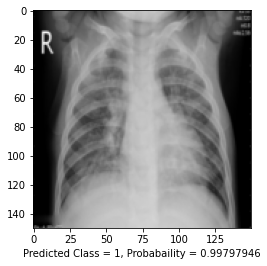

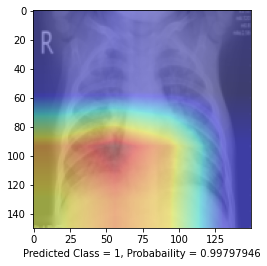

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[1.6906714 1.8802652 1.4579332 1.0417068]
 [1.5671871 2.3613877 2.2874317 1.7213422]
 [6.40582   8.469295  6.167814  2.2566214]
 [5.375571  7.21313   5.6465106 2.2155733]]


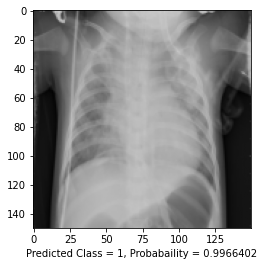

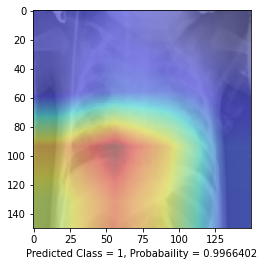

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[1.5970004  2.3226922  2.0823348  1.4623169 ]
 [0.6886403  0.43790308 0.9139941  1.268792  ]
 [5.684126   8.308202   6.8616333  0.7635333 ]
 [5.0389924  6.821731   6.4108253  1.052273  ]]


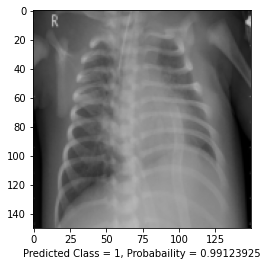

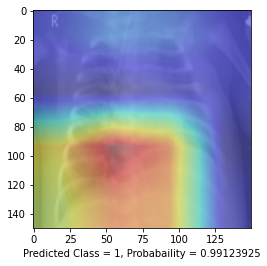

(4, 4, 1024)
(4, 4)
(150, 150, 3)
[[1.9710225 2.681065  1.9910635 1.9312655]
 [1.2275622 0.8998879 1.155994  1.0788046]
 [7.1497326 8.999234  5.147718  1.4712021]
 [5.8921037 7.0572157 4.9465656 1.4247489]]


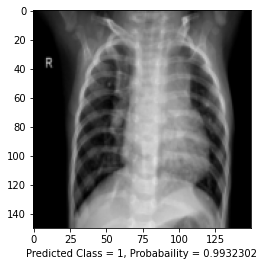

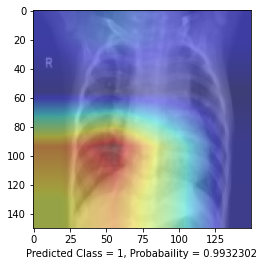

In [ ]:
import cv2
count = 0
idx = 623
while(count<40 and y_test[idx]==1):
    features_for_one_img = features[idx,:,:,:]
    # height_roomout = X_train.shape[1]/features_for_one_img.shape[0]
    # width_roomout = X_train.shape[2]/features_for_one_img.shape[1]
    # print(height_roomout," ",width_roomout)
    # cam_features = sp.ndimage.zoom(features_for_one_img,(height_roomout,width_roomout,1),order=2)
    # print(cam_features.shape)
    pred = np.argmax(results[idx])
    if pred == y_test[idx]:
    # for pred2 in [0,1]:
        count += 1
        cam_features = features_for_one_img
        print(features_for_one_img.shape)
        plt.figure(facecolor='white')
        cam_weights = gap_weights[:,pred]
        # cam_weights = gap_weights
        cam_output = np.dot(cam_features,cam_weights)
        print(cam_output.shape)
        print(X_test[idx].shape)
        buf = 'Predicted Class = '+str(pred)+', Probabaility = '+str(results[idx][pred]) 
        print(cam_output)
        plt.xlabel(buf)
        plt.imshow(X_test[idx])
        plt.show()
        buf = 'Predicted Class = '+str(pred)+', Probabaility = '+str(results[idx][pred]) 
        plt.xlabel(buf)
        plt.imshow(X_test[idx],alpha=0.6)
        cam_output = cv2.resize(cam_output,dsize=(150, 150) )
        # print(cam_output.shape)
        # cam_output = scipy.ndimage.zoom(cam_output, (150,150,3), order=3)
        plt.imshow(cam_output, cmap='jet',alpha=0.4)
        plt.show()

    idx -= 1